In [123]:
from google.colab import drive  #Librería para accesar a archivos drive
import os  #Librería manejo del sistema

# Montar el archivo del drive (con previa autorización del usuario)
drive.mount('/content/drive', force_remount=True)

# Abrir el documento con la ruta de acceso personal predeterminada.
os.chdir("/content/drive/MyDrive/Sistemas_V/T2_Segmentacion")  #Cuenta carlos


Mounted at /content/drive


(287, 780, 3)


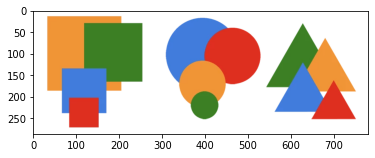

In [124]:
import cv2  # libreria trabajo con imagenes
import matplotlib.pyplot as plt # libreria trabajo con graficos

from google.colab.patches import cv2_imshow # Se utiliza este parche para 
                                            # poder mostrar las imágenes en
                                            # pantalla




image = cv2.imread('imagenes/img_tarea_descargada.png')


print(image.shape)



image_plt = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image_plt)
plt.show()

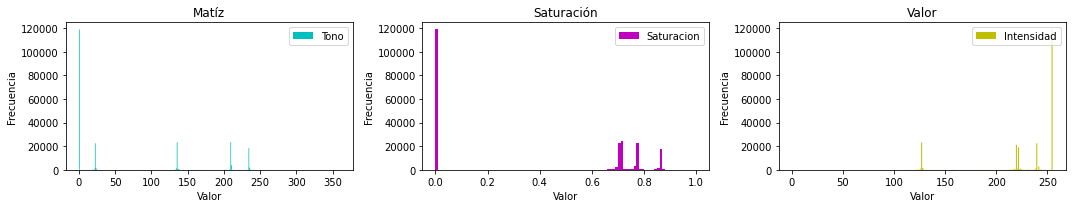

(287, 780, 3)


In [125]:
import matplotlib.colors as colors
import numpy as np

array=np.asarray(image)
arr=(array.astype(float))/255.0
img_hsv = colors.rgb_to_hsv(arr[...,:3])
plt.subplots(figsize=(15, 3))

lu1=img_hsv[...,0].flatten()
plt.subplot(1,3,1)
plt.hist(lu1*360,bins=360,range=(0.0,360.0),histtype='stepfilled', color='c', label='Tono')
plt.title("Matíz")
plt.xlabel("Valor")
plt.ylabel("Frecuencia")
plt.legend()

lu2=img_hsv[...,1].flatten()
plt.subplot(1,3,2)                  
plt.hist(lu2,bins=100,range=(0.0,1.0),histtype='stepfilled', color='m', label='Saturacion')
plt.title("Saturación")   
plt.xlabel("Valor")
plt.ylabel("Frecuencia")
plt.legend()

lu3=img_hsv[...,2].flatten()
plt.subplot(1,3,3)                  
plt.hist(lu3*255,bins=256,range=(0.0,255.0),histtype='stepfilled', color='y', label='Intensidad')
plt.title("Valor")   
plt.xlabel("Valor")
plt.ylabel("Frecuencia")
plt.legend()

plt.tight_layout()
plt.show()

print(img_hsv.shape)

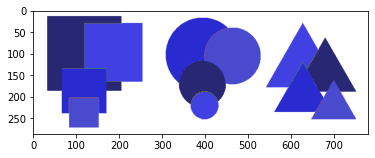

In [126]:
h = img_hsv[...,0]
s = img_hsv[...,1]
v = img_hsv[...,2]


h_new = h
s_new = s
v_new = v


h_img = image.shape[0]
w_img = image.shape[1]



val_color1 =  235  #ROJO
val_color2 =  210 #AMARILLO
val_color3 =  135  #VERDE
val_color4 =  25  #AZUL


por_desvi = 0.05


val_sat1 =  []  #ROJO
val_sat2 =  [] #AMARILLO
val_sat3 =  []  #VERDE
val_sat4 =  []  #AZUL



for i in range(h_img):
    for j in range(w_img):
      if ( ( ( val_color1 - (360*por_desvi) ) <= 360*h[i,j] <= ( val_color1 + (360*por_desvi) ) )   ): 
        val_sat1.append(s[i,j])

      elif ( ( ( val_color2 - (360*por_desvi) ) <= 360*h[i,j] <= ( val_color2 + (360*por_desvi) ) )  ):
        val_sat2.append(s[i,j])

      elif ( ( ( val_color3 - (360*por_desvi) ) <= 360*h[i,j] <= ( val_color3 + (360*por_desvi) ) )  ): 
        val_sat3.append(s[i,j])

      elif ( ( ( val_color4 - (360*por_desvi) ) <= 360*h[i,j] <= ( val_color4 + (360*por_desvi) ) )  ):
        val_sat4.append(s[i,j])



val_1 =  []  #ROJO
val_2 =  [] #AMARILLO
val_3 =  []  #VERDE
val_4 =  []  #AZUL



for i in range(h_img):
    for j in range(w_img):
      if ( ( ( val_color1 - (360*por_desvi) ) <= 360*h[i,j] <= ( val_color1 + (360*por_desvi) ) )   ): 
        val_1.append(v[i,j])

      elif ( ( ( val_color2 - (360*por_desvi) ) <= 360*h[i,j] <= ( val_color2 + (360*por_desvi) ) )  ):
        val_2.append(v[i,j])

      elif ( ( ( val_color3 - (360*por_desvi) ) <= 360*h[i,j] <= ( val_color3 + (360*por_desvi) ) )  ): 
        val_3.append(v[i,j])

      elif ( ( ( val_color4 - (360*por_desvi) ) <= 360*h[i,j] <= ( val_color4 + (360*por_desvi) ) )  ):
        val_4.append(v[i,j])


porc_var = int(360*0.05)  #Variacion de color 1%

import random

cambio = random.randint(-porc_var,porc_var)

for i in range(h_img):
    for j in range(w_img):
      if ( ( ( val_color1 - (360*por_desvi) ) <= 360*h[i,j] <= ( val_color1 + (360*por_desvi) ) )   ): 
        h_new[i,j] = int((val_color4 + cambio)/360.0) 
        s_new[i,j] = np.mean(val_sat4) + (cambio/360)
        v_new[i,j] = np.mean(val_4) + (cambio/360)

      elif ( ( ( val_color2 - (360*por_desvi) ) <= 360*h[i,j] <= ( val_color2 + (360*por_desvi) ) )  ):
        h_new[i,j] = int((val_color3 + cambio)/360.0) 
        s_new[i,j] = np.mean(val_sat3) + (cambio/360)
        v_new[i,j] = np.mean(val_3) + (cambio/360)


      elif ( ( ( val_color3 - (360*por_desvi) ) <= 360*h[i,j] <= ( val_color3 + (360*por_desvi) ) )  ): 
        h_new[i,j] = int((val_color2 + cambio)/360.0) 
        s_new[i,j] = np.mean(val_sat2) + (cambio/360)
        v_new[i,j] = np.mean(val_2) + (cambio/360)


      elif ( ( ( val_color4 - (360*por_desvi) ) <= 360*h[i,j] <= ( val_color4 + (360*por_desvi) ) )  ):
        h_new[i,j] = int((val_color1 + cambio)/360.0) 
        s_new[i,j] = np.mean(val_sat1) + (cambio/360)
        v_new[i,j] = np.mean(val_1) + (cambio/360)



recolor = img_hsv
recolor[...,0] = h_new
recolor[...,1] = s_new
recolor[...,2] = v_new


new_color = colors.hsv_to_rgb(recolor[...,:3])

new_color_sh = cv2.cvtColor(np.float32(new_color), cv2.COLOR_BGR2RGB)
plt.imshow(new_color_sh)

plt.imsave("salida_cambiada.png",new_color_sh)

plt.show()